**Comencemos estos ejemplos importando las librerías que vamos a usar durante todo este documento**

In [1]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy_financial as npf

*Esta librería importa las funciones financieras*

In [3]:
import numpy as np

*Esta librería nos permite hacer matrices*

In [4]:
import matplotlib.pyplot as plt

*Esta librería nos va a permitir hacer gráficos*

*A CONTINUACIÓN VEMOS LOS EJEMPLOS*

**1. Calcular el montante alcanzado a los 5 años, al capitalizar 1.000 € en capitalización compuesta al 6,16% efectivo anual.**

In [5]:
n=5
c0 = 1000
i = 0.0616

fv = npf.fv(rate=i, nper=n, pmt= 0,pv=-c0, when='end')
print("El capital final en esta operación es {:,.2f}".format(fv))

El capital final en esta operación es 1,348.36


**2. Andrés debe a María 160.000 € que debería pagar hoy. Puesto que no dispone de la cantidad completa en este momento, acuerda con María que hoy la pagará 40.000 € y que el resto lo pagará dentro de 20 meses. María acepta pero imponiéndole un tipo de interés del 9,0% efectivo anual en capitalización compuesta. Calcular el importe que le queda por pagar a Andrés.**

*En este caso tendremos que valorar lo que queda pendiente de pago = total(160.000 €) - lo que paga hoy(40.000 €), por tanto la deuda es de 120.000 €*

*Ojo también con el tiempo. En este caso nos dicen que la deuda se pagará en 20 meses, y el porcentaje está expresado en años, por lo que tenemos que dividir los meses entre 12 para pasar el tiempo a años, ya que todas las cantidades deben ser proporcionadas con la misma unidad temporal, es decir, si el tanto es anual la duración de la operación debe expresarse en años.*

In [6]:
n=20/12
c0 = 120000
i = 0.09

fv = npf.fv(rate=i, nper=n, pmt= 0,pv=-c0, when='end')
print("La deuda de Andrés es {:,.2f} euros".format((fv)))

La deuda de Andrés es 138,534.76 euros


**3. Pedro quiere ahorrar 2000 euros por año durante 25 años en un producto financiero cuya rentabilidad es del 3%.¿Qué cantidad dispondrá al final de los 25 años?**

In [7]:
n=25
pmt = 2000
i = 0.03

fv = npf.fv(rate=i, nper=n, pmt= -pmt, pv=0, when='end')
print("Pedro dispondrá de {:,.2f} euros".format((fv)))

Pedro dispondrá de 72,918.53 euros


**4. María dispone de 100.000 euros, los va a invertir en un producto financiero cuya rentabilidad es de 3%, durante 25 años. Sin embargo, con ese dinero también tiene que pagar un alquiler de 5.000 euros anuales que irá retirando. María quiere saber cuánto dinero le quedará al final de los 25 años**

In [8]:
pv = 100000
n=25
pmt = 5000
i = 0.03

fv = npf.fv(rate=i, nper=n, pmt= pmt, pv=-pv, when='end')
print("María dispondrá de {:,.2f} euros".format(fv))

María dispondrá de 27,081.47 euros


**5. Ana tiene otra preocupación. Cuando se jubile dentro de 25 años, quiere haber ahorrado 100.000 euros para poder retirarse tranquilamente en su pueblo. Ana quiere saber cuánto tiene que ahorrar anualmente para llegar a dicha cantidad, si invierte en un producto financiero que le asegura una rentabilidad del 3%**

In [9]:
fv = 100000
n=25
#pmt = ?
i = 0.03


pmt = npf.pmt(rate=i, nper=n, pv=0, fv=-fv, when='end')
print("Ana tendrá que ahorrar {:,.2f} euros anuales".format(pmt))

Ana tendrá que ahorrar 2,742.79 euros anuales


**6. Eva ha decidido ahorrar cuando cumpla 30 años, haciendo aportaciones en un plan de pensiones que tiene una rentabilidad del 4%. Con lo ahorrado, cuando cumpla 65 años quiere obtener una mensualidad de 2.500 € al inicio de cada mes, y el importe restante se mantiene a un 3%, hasta que cumpla 90 años momento en el que quiere cobrar 100.000 €. ¿Cuánto tendrá que aportar anualmente Eva a su plan de pensiones?**

In [10]:
#Primera fase del ejercicio: Calcular el capital inicial que debemos tener cuando cumpla Eva 65 años.

fv = 100000
n = 25       #12 meses * 25 años
i = 0.03     #3% / 12 meses
pmt = 2500
m = 12

pv = npf.pv(rate=i/m, nper=n*m, pmt=-pmt, fv=-fv, when='begin')
print("Eva necesita tener {:,.2f} euros cuando cumpla 65 años".format(pv))

#Segunda fase del ejercicio: Calcular las aportaciones al plan de pensiones anualmente.

fv2 = pv
n2 = 35       #12 meses * 35 años
i2 = 0.04     #4% / 12 meses
pv1 = 0
m = 12

pmt = npf.pmt(rate = i2/m, nper = n2*m, pv= pv1, fv=-fv2)
print("Eva necesita ahorrar {:,.2f} euros al mes para cumplir su objetivo".format(pmt))

Eva necesita tener 575,790.00 euros cuando cumpla 65 años
Eva necesita ahorrar 630.15 euros al mes para cumplir su objetivo


*Si quisieramos resolver el problema con Excel debemos utilizar la fórmula VA y Pago.*

*Una de las ventajas de Python es la versatilidad a la hora de realizar cálculos, así como su rápidez. Si queremos por ejemplo valorar distintos tipos de intereses porque tenemos alternativas de inversión, Python es capaz de calcularlo rápidamente sin necesidad de aplicar la fórmula en varias ocasiones.*

**7. Imaginemos que Eva tiene distintos productos financieros con distintos tipos de interés, que van desde 5% hasta 6%, variando 0.05 ptos. Vamos a comprobar como Python rápidamente puede realizar los cálculos**

In [11]:
np.arange(0.005, 0.065, 0.005)  #Esto crea una lista de tipos de interés entre 5% y 6%, con un intervalo de 0.05

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 ])

In [12]:
#Primera fase: Cálculo del importe que necesita Eva cuando tenga 65 años

fv = 100000
n = 25       #12 meses * 25 años
i = np.arange(0.005, 0.065, 0.005)
pmt = 2500
m = 12

pv = npf.pv(rate=i/m, nper=n*m, pmt=-pmt, fv=-fv, when='begin')
pv

array([793426.41897161, 741795.38006778, 694625.90517336, 651486.6280425 ,
       611990.48665175, 575789.99784833, 542573.04921771, 512059.15047025,
       483996.09318006, 458156.9734919 , 434337.5375343 , 412353.81381446])

*Con un solo código, podemos obtener los importes que necesita Eva en función de los intereses del producto en el que invierta, y por tanto, que cantidad necesita ahorrar*

In [13]:
#Segunda fase del ejercicio: Calcular las aportaciones al plan de pensiones anualmente.

fv2 = pv
n2 = 35       #12 meses * 35 años
i2 = 0.04     #4% / 12 meses
pv1 = 0
m = 12

pmt = npf.pmt(rate = i2/m, nper = n2*m, pv= pv1, fv=-fv2)
pmt

array([868.33704199, 811.8313062 , 760.20836887, 712.99613671,
       669.77100358, 630.15267904, 593.79958286, 560.40474253,
       529.69213759, 501.41344127, 475.34511525, 451.28581854])

*Aquí podemos comprobar la cantidad que necesita ahorrar Eva, según las distintas rentabilidades*

*Incluso podemos realizar un gráfica que nos permita de un vistazo ver la relación entre la rentabilidad y la necesidad de ahorro*

In [14]:
import matplotlib.pyplot as plt

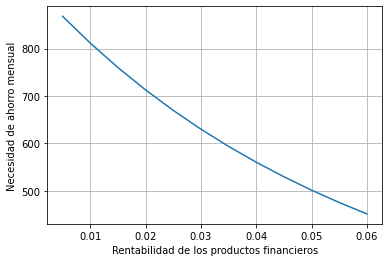

In [15]:
plt.plot(np.arange(0.005, 0.065, 0.005), np.abs(pmt))
plt.grid()
plt.xlabel("Rentabilidad de los productos financieros")
plt.ylabel("Necesidad de ahorro mensual")
plt.show()